In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import torch.nn as nn
# from torch.utils.data import DataLoader
# import torch.optim as optim
# import torch
from sklearn.model_selection import train_test_split
import os
import sys
from sklearn.metrics import accuracy_score
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [103]:
# Set the root directory of your repo as part of the path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [104]:
data = pd.read_csv('../Data/combined/full_lathan.csv')

/var/folders/sj/xc1pvfqd479gs7_4_rxlkx_c0000gn/T/ipykernel_9473/4119657318.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Data/combined/full_lathan.csv')


In [105]:
# Vegas data
vegas = pd.read_csv('../Data/combined/full_vegas_data.csv')
vegas.head()

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,YEAR
0,2012-10-30,away,Washington,Cleveland,1610612764,21200001,44.6,220.0,210.0,200.0,...,-108.17,191.0,187.0,-104.0,-110.0,84.0,-10.0,L,178.0,2012-2013
1,2012-10-30,home,Cleveland,Washington,1610612739,21200001,55.4,-260.0,-235.0,-240.0,...,-110.17,191.0,187.0,-106.0,-115.0,94.0,10.0,W,178.0,2012-2013
2,2012-10-30,away,Boston,Miami,1610612738,21200002,44.8,220.0,244.0,240.0,...,-107.33,188.0,182.0,-104.0,-110.0,107.0,-13.0,L,227.0,2012-2013
3,2012-10-30,home,Miami,Boston,1610612748,21200002,55.2,-260.0,-275.0,-260.0,...,-109.33,188.0,182.0,-105.0,-115.0,120.0,13.0,W,227.0,2012-2013
4,2012-10-30,away,Dallas,L.A. Lakers,1610612742,21200003,40.8,350.0,393.0,420.0,...,-107.50,187.0,185.0,-100.0,-110.0,99.0,8.0,W,190.0,2012-2013


In [106]:
# sort vegas by GameID then Location
vegas = vegas.sort_values(by=['GameId', 'Location'])
vegas

,Date,Location,Team,OppTeam,TeamId,GameId,PercentBet_ML,Open_Line_ML,Pinnacle_ML,5dimes_ML,...,Average_Odds_OU,Best_Line_OU,Worst_Line_OU,Best_Odds_OU,Worst_Odds_OU,Pts,Spread,Result,Total,YEAR
0,2012-10-30,away,Washington,Cleveland,1610612764,21200001,44.6,220.0,210.0,200.0,...,-108.17,191.0,187.0,-104.0,-110.0,84.0,-10.0,L,178.0,2012-2013
1,2012-10-30,home,Cleveland,Washington,1610612739,21200001,55.4,-260.0,-235.0,-240.0,...,-110.17,191.0,187.0,-106.0,-115.0,94.0,10.0,W,178.0,2012-2013
2,2012-10-30,away,Boston,Miami,1610612738,21200002,44.8,220.0,244.0,240.0,...,-107.33,188.0,182.0,-104.0,-110.0,107.0,-13.0,L,227.0,2012-2013
3,2012-10-30,home,Miami,Boston,1610612748,21200002,55.2,-260.0,-275.0,-260.0,...,-109.33,188.0,182.0,-105.0,-115.0,120.0,13.0,W,227.0,2012-2013
4,2012-10-30,away,Dallas,L.A. Lakers,1610612742,21200003,40.8,350.0,393.0,420.0,...,-107.50,187.0,185.0,-100.0,-110.0,99.0,8.0,W,190.0,2012-2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17203,2019-04-10,home,Denver,Minnesota,1610612743,21801228,45.2,-900.0,-794.0,-830.0,...,-107.17,218.5,218.0,-105.0,-110.0,99.0,4.0,W,194.0,2018-2019
17204,2019-04-10,away,Utah,L.A. Clippers,1610612762,21801229,61.6,199.0,249.0,275.0,...,-107.40,226.0,225.0,-102.0,-115.0,137.0,-6.0,L,280.0,2018-2019
17205,2019-04-10,home,L.A. Clippers,Utah,1610612746,21801229,38.4,-240.0,-281.0,-305.0,...,-106.60,226.0,225.0,-105.0,-110.0,143.0,6.0,W,280.0,2018-2019
17206,2019-04-10,away,Sacramento,Portland,1610612758,21801230,58.1,317.0,135.0,135.0,...,-107.67,229.0,226.5,-105.0,-111.0,131.0,-5.0,L,267.0,2018-2019


In [107]:
vegas.columns

Index(['Date', 'Location', 'Team', 'OppTeam', 'TeamId', 'GameId',
       'PercentBet_ML', 'Open_Line_ML', 'Pinnacle_ML', '5dimes_ML',
       'Heritage_ML', 'Bovada_ML', 'Betonline_ML', 'Average_Line_ML',
       'Best_Line_ML', 'Worst_Line_ML', 'PercentBet_Spread',
       'Open_Line_Spread', 'Open_Odds_Spread', 'Pinnacle_Line_Spread',
       'Pinnacle_Odds_Spread', '5dimes_Line_Spread', '5dimes_Odds_Spread',
       'Heritage_Line_Spread', 'Heritage_Odds_Spread', 'Bovada_Line_Spread',
       'Bovada_Odds_Spread', 'Betonline_Line_Spread', 'Betonline_Odds_Spread',
       'Average_Line_Spread', 'Average_Odds_Spread', 'Best_Line_Spread',
       'Worst_Line_Spread', 'Best_Odds_Spread', 'Worst_Odds_Spread',
       'PercentBet_OU', 'Open_Line_OU', 'Open_Odds_OU', 'Pinnacle_Line_OU',
       'Pinnacle_Odds_OU', '5dimes_Line_OU', '5dimes_Odds_OU',
       'Heritage_Line_OU', 'Heritage_Odds_OU', 'Bovada_Line_OU',
       'Bovada_Odds_OU', 'Betonline_Line_OU', 'Betonline_Odds_OU',
       'Average_Line

In [108]:
# --- Step 1: Define shared columns (same across home/away teams) ---
shared_columns = ['Total', 'Worst_Line_OU', 'Best_Line_OU', 'Average_Line_OU']

# --- Step 2: Split into home and away teams ---
df_home = vegas[vegas['Location'] == 'home'].copy()
df_away = vegas[vegas['Location'] == 'away'].copy()

# --- Step 3: Drop shared columns from away team to avoid duplication ---
df_home = df_home.drop(columns=['Location'])  # Don't need location after naming
df_away = df_away.drop(columns=shared_columns + ['Location'])

# --- Step 4: Prefix all columns (except identifiers) ---
home_prefix = 'h_'
away_prefix = 'a_'
id_cols = ['GameId']  # Columns to merge on

df_home = df_home.rename(columns={col: home_prefix + col for col in df_home.columns if col not in id_cols})
df_away = df_away.rename(columns={col: away_prefix + col for col in df_away.columns if col not in id_cols})

# --- Step 5: Merge home and away teams on GameId ---
df_merged = pd.merge(df_home, df_away, on='GameId', how='inner')

# --- Step 6: Add shared columns (only from home, since they're the same) ---
shared_data = vegas[vegas['Location'] == 'home'][['GameId'] + shared_columns]
df_final = pd.merge(df_merged, shared_data, on='GameId', how='left')

# Optional: reorder columns to start with GameId
cols = ['GameId'] + [col for col in df_final.columns if col != 'GameId']
df_final = df_final[cols]

In [109]:
vegas = df_final

In [110]:
from src.data.preprocess import (
    combine_team_rows,
    add_home_win_column,
    split_wins_losses,
    add_playoff_indicator,
    combine_date_columns,
    remove_all_star_and_playoff_games,
    create_ml_dataset

)

In [111]:
# Creating key predictor columns
data2 = create_ml_dataset(data)

In [112]:
# Dropping GAME_DATE_EST
data2 = data2.drop(columns=['GAME_DATE_EST'])

In [113]:
data2.columns

Index(['GAME_ID', 'GAME_SEQUENCE', 'Date', 'YEAR', 'a_index', 'a_TEAM_ID',
       'a_TEAM_WINS_LOSSES', 'a_PTS', 'a_FG_PCT', 'a_FT_PCT', 'a_FG3_PCT',
       'a_AST', 'a_REB', 'a_TOV', 'h_index', 'h_TEAM_ID', 'h_TEAM_WINS_LOSSES',
       'h_PTS', 'h_FG_PCT', 'h_FT_PCT', 'h_FG3_PCT', 'h_AST', 'h_REB', 'h_TOV',
       'HOME_WIN', 'a_WINS', 'a_LOSSES', 'h_WINS', 'h_LOSSES',
       'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED', 'IS_PLAYOFF_GAME',
       'a_season_PTS_lag', 'a_season_AST_lag', 'a_season_REB_lag',
       'a_season_TOV_lag', 'a_season_FG_PCT_avg', 'a_season_FT_PCT_avg',
       'a_season_FG3_PCT_avg', 'a_WIN_PCT', 'a_WIN_PCT_LAST10',
       'h_season_PTS_lag', 'h_season_AST_lag', 'h_season_REB_lag',
       'h_season_TOV_lag', 'h_season_FG_PCT_avg', 'h_season_FT_PCT_avg',
       'h_season_FG3_PCT_avg', 'h_WIN_PCT', 'h_WIN_PCT_LAST10'],
      dtype='object')

In [114]:
vegas.shape, data2.shape

((8604, 115), (8610, 50))

In [115]:
combined_df = pd.merge(data2, vegas, left_on = 'GAME_ID',right_on='GameId', how='left')

In [116]:
# Drop lines from specific books. Keep only best, worst, and average lines
# --- Step 1: Define sportsbook names to remove ---
books_to_drop = ['Pinnacle', '5dimes', 'Heritage', 'Bovada', 'Betonline']

# --- Step 2: Identify columns to drop ---
columns_to_drop = [col for col in combined_df.columns if any(book in col for book in books_to_drop)]

# --- Step 3: Drop those columns from the DataFrame ---
combined_df = combined_df.drop(columns=columns_to_drop)
columns_to_drop = [col for col in combined_df.columns if any(book in col for book in books_to_drop)]
combined_df = combined_df.drop(columns=columns_to_drop)


In [117]:
combined_df

,GAME_ID,GAME_SEQUENCE,Date,YEAR,a_index,a_TEAM_ID,a_TEAM_WINS_LOSSES,a_PTS,a_FG_PCT,a_FT_PCT,...,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,a_Spread,a_Result,a_YEAR,Total,Worst_Line_OU,Best_Line_OU,Average_Line_OU
0,21200001,1,2012-10-30,2012-2013,1,1610612739,1-0,94,0.456,0.682,...,-104.0,-110.0,84.0,-10.0,L,2012-2013,178.0,187.0,191.0,190.33
1,21200002,2,2012-10-30,2012-2013,2,1610612738,0-1,107,0.520,0.821,...,-104.0,-110.0,107.0,-13.0,L,2012-2013,227.0,182.0,188.0,186.58
2,21200003,3,2012-10-30,2012-2013,4,1610612742,1-0,99,0.471,0.778,...,-100.0,-110.0,99.0,8.0,W,2012-2013,190.0,185.0,187.0,186.00
3,21200004,1,2012-10-31,2012-2013,6,1610612754,1-0,90,0.474,0.688,...,-109.0,-110.0,90.0,2.0,W,2012-2013,178.0,188.0,190.5,189.75
4,21200005,2,2012-10-31,2012-2013,8,1610612743,0-1,75,0.375,0.455,...,-100.0,-110.0,75.0,-9.0,L,2012-2013,159.0,196.5,202.0,197.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,21801226,7,2019-04-10,2018-2019,17217,1610612749,60-22,116,0.430,0.714,...,-105.0,-115.0,127.0,11.0,W,2018-2019,243.0,227.0,230.0,227.67
8606,21801227,8,2019-04-10,2018-2019,17218,1610612742,33-49,94,0.407,0.750,...,-105.0,-110.0,94.0,-11.0,L,2018-2019,199.0,218.0,219.0,218.42
8607,21801228,9,2019-04-10,2018-2019,17221,1610612743,54-28,99,0.448,0.647,...,-102.0,-115.0,95.0,-4.0,L,2018-2019,194.0,218.0,218.5,218.42
8608,21801229,10,2019-04-10,2018-2019,17223,1610612746,48-34,143,0.509,0.767,...,-102.0,-115.0,137.0,-6.0,L,2018-2019,280.0,225.0,226.0,225.50


In [118]:
columns_to_drop = ['a_FG_PCT', 'a_FT_PCT','a_FG3_PCT', 'a_AST', 'a_REB', 'a_TOV','GAME_ID', 'h_FG_PCT', 
                   'h_FT_PCT', 'h_FG3_PCT','h_AST', 'h_REB', 'h_TOV',
                   'GAME_SEQUENCE', 'a_index', 'a_TEAM_ID','h_TEAM_ID', 'a_TEAM_WINS_LOSSES',
                  'h_TEAM_WINS_LOSSES', 'IS_PLAYOFF_GAME', 'h_index', 'HOME_WIN', 'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED', 
                  'a_WINS', 'a_LOSSES', 'h_WINS', 'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED', 'a_season_PTS_lag', 'a_season_AST_lag', 
                  'a_season_REB_lag', 'a_season_TOV_lag', 'h_season_PTS_lag', 'h_season_AST_lag', 'h_season_REB_lag', 'h_season_TOV_lag', 
                  'h_Date', 'h_Team', 'h_OppTeam', 'h_TeamId', 'h_YEAR', 'h_Result', 'h_Total', 'a_Date', 'a_Team', 'a_OppTeam', 'a_TeamId', 'a_YEAR', 'a_Result']
combined_df = combined_df.drop(columns=columns_to_drop)
combined_df

,Date,YEAR,a_PTS,h_PTS,h_LOSSES,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,...,a_Open_Odds_OU,a_Average_Odds_OU,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,a_Spread,Total,Worst_Line_OU,Best_Line_OU,Average_Line_OU
0,2012-10-30,2012-2013,94,84,0,0.465846,0.804308,0.361782,NaN,NaN,...,-110.0,-108.17,-104.0,-110.0,84.0,-10.0,178.0,187.0,191.0,190.33
1,2012-10-30,2012-2013,107,120,0,0.451780,0.751817,0.350976,NaN,NaN,...,-110.0,-107.33,-104.0,-110.0,107.0,-13.0,227.0,182.0,188.0,186.58
2,2012-10-30,2012-2013,99,91,0,0.452739,0.786101,0.344986,NaN,NaN,...,-110.0,-107.50,-100.0,-110.0,99.0,8.0,190.0,185.0,187.0,186.00
3,2012-10-31,2012-2013,90,88,0,0.456184,0.779842,0.359789,NaN,NaN,...,-110.0,-109.83,-109.0,-110.0,90.0,2.0,178.0,188.0,190.5,189.75
4,2012-10-31,2012-2013,75,84,0,0.446300,0.740671,0.340429,NaN,NaN,...,-110.0,-108.33,-100.0,-110.0,75.0,-9.0,159.0,196.5,202.0,197.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2019-04-10,2018-2019,116,127,33,0.476958,0.784458,0.358021,0.740741,0.5,...,-110.0,-108.83,-105.0,-115.0,127.0,11.0,243.0,227.0,230.0,227.67
8606,2019-04-10,2018-2019,94,105,34,0.446870,0.740536,0.341058,0.407407,0.5,...,-110.0,-105.83,-105.0,-110.0,94.0,-11.0,199.0,218.0,219.0,218.42
8607,2019-04-10,2018-2019,99,95,45,0.464621,0.766652,0.349333,0.654321,0.4,...,-110.0,-107.83,-102.0,-115.0,95.0,-4.0,194.0,218.0,218.5,218.42
8608,2019-04-10,2018-2019,143,137,31,0.467218,0.783073,0.397018,0.580247,0.7,...,NaN,-107.40,-102.0,-115.0,137.0,-6.0,280.0,225.0,226.0,225.50


In [119]:
combined_df['h_cover'] = np.where((combined_df['h_PTS'] + combined_df['h_Average_Line_Spread'] - combined_df['a_PTS']) > 0, 1, 0)
combined_df['over_cover'] = np.where(combined_df['Total'] > combined_df['Average_Line_OU'], 1, 0)
combined_df

,Date,YEAR,a_PTS,h_PTS,h_LOSSES,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,...,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,a_Spread,Total,Worst_Line_OU,Best_Line_OU,Average_Line_OU,h_cover,over_cover
0,2012-10-30,2012-2013,94,84,0,0.465846,0.804308,0.361782,NaN,NaN,...,-104.0,-110.0,84.0,-10.0,178.0,187.0,191.0,190.33,0,0
1,2012-10-30,2012-2013,107,120,0,0.451780,0.751817,0.350976,NaN,NaN,...,-104.0,-110.0,107.0,-13.0,227.0,182.0,188.0,186.58,1,1
2,2012-10-30,2012-2013,99,91,0,0.452739,0.786101,0.344986,NaN,NaN,...,-100.0,-110.0,99.0,8.0,190.0,185.0,187.0,186.00,0,1
3,2012-10-31,2012-2013,90,88,0,0.456184,0.779842,0.359789,NaN,NaN,...,-109.0,-110.0,90.0,2.0,178.0,188.0,190.5,189.75,0,0
4,2012-10-31,2012-2013,75,84,0,0.446300,0.740671,0.340429,NaN,NaN,...,-100.0,-110.0,75.0,-9.0,159.0,196.5,202.0,197.83,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2019-04-10,2018-2019,116,127,33,0.476958,0.784458,0.358021,0.740741,0.5,...,-105.0,-115.0,127.0,11.0,243.0,227.0,230.0,227.67,1,1
8606,2019-04-10,2018-2019,94,105,34,0.446870,0.740536,0.341058,0.407407,0.5,...,-105.0,-110.0,94.0,-11.0,199.0,218.0,219.0,218.42,0,0
8607,2019-04-10,2018-2019,99,95,45,0.464621,0.766652,0.349333,0.654321,0.4,...,-102.0,-115.0,95.0,-4.0,194.0,218.0,218.5,218.42,0,0
8608,2019-04-10,2018-2019,143,137,31,0.467218,0.783073,0.397018,0.580247,0.7,...,-102.0,-115.0,137.0,-6.0,280.0,225.0,226.0,225.50,0,1


In [120]:
cols_to_drop = ['h_PTS', 'a_PTS', 'h_LOSSES', 'h_Spread', 'Total', 'a_Spread', 'a_Pts', 'h_Pts']
combined_df = combined_df.drop(columns=cols_to_drop)
combined_df

,Date,YEAR,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,...,a_Open_Line_OU,a_Open_Odds_OU,a_Average_Odds_OU,a_Best_Odds_OU,a_Worst_Odds_OU,Worst_Line_OU,Best_Line_OU,Average_Line_OU,h_cover,over_cover
0,2012-10-30,2012-2013,0.465846,0.804308,0.361782,NaN,NaN,0.448566,0.772697,0.339461,...,187.0,-110.0,-108.17,-104.0,-110.0,187.0,191.0,190.33,0,0
1,2012-10-30,2012-2013,0.451780,0.751817,0.350976,NaN,NaN,0.471600,0.683800,0.320200,...,182.0,-110.0,-107.33,-104.0,-110.0,182.0,188.0,186.58,1,1
2,2012-10-30,2012-2013,0.452739,0.786101,0.344986,NaN,NaN,0.480692,0.803808,0.365885,...,185.0,-110.0,-107.50,-100.0,-110.0,185.0,187.0,186.00,0,1
3,2012-10-31,2012-2013,0.456184,0.779842,0.359789,NaN,NaN,0.454478,0.714000,0.349896,...,188.0,-110.0,-109.83,-109.0,-110.0,188.0,190.5,189.75,0,0
4,2012-10-31,2012-2013,0.446300,0.740671,0.340429,NaN,NaN,0.477140,0.743980,0.374400,...,202.0,-110.0,-108.33,-100.0,-110.0,196.5,202.0,197.83,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2019-04-10,2018-2019,0.476958,0.784458,0.358021,0.740741,0.5,0.454015,0.715500,0.348742,...,230.0,-110.0,-108.83,-105.0,-115.0,227.0,230.0,227.67,1,1
8606,2019-04-10,2018-2019,0.446870,0.740536,0.341058,0.407407,0.5,0.477413,0.819921,0.392302,...,218.0,-110.0,-105.83,-105.0,-110.0,218.0,219.0,218.42,0,0
8607,2019-04-10,2018-2019,0.464621,0.766652,0.349333,0.654321,0.4,0.453472,0.787917,0.352389,...,218.5,-110.0,-107.83,-102.0,-115.0,218.0,218.5,218.42,0,0
8608,2019-04-10,2018-2019,0.467218,0.783073,0.397018,0.580247,0.7,0.469817,0.735549,0.352423,...,NaN,NaN,-107.40,-102.0,-115.0,225.0,226.0,225.50,0,1


In [121]:
def moneyline_to_probability(odds):
    """Convert moneyline odds to implied probability (vectorized for arrays)."""
    return np.where(
        odds < 0,
        -odds / (-odds + 100),
        100 / (odds + 100)
    )

# Convert both home and away moneyline odds to implied probabilities
home_probs = moneyline_to_probability(combined_df['h_Average_Line_ML'])
away_probs = moneyline_to_probability(combined_df['a_Average_Line_ML'])

# Normalize to remove the vig (so that home + away = 1)
total_probs = home_probs + away_probs
combined_df['h_Implied_Prob_ML'] = home_probs / total_probs

In [122]:
if combined_df['h_PercentBet_ML'].max() > 1:
    combined_df['h_PercentBet_ML'] = combined_df['h_PercentBet_ML'] / 100.0
    
eps = 1e-6
p_public = combined_df['h_PercentBet_ML'].clip(eps, 1 - eps)
p_vegas = combined_df['h_Implied_Prob_ML'].clip(eps, 1 - eps)

# Log-odds based favorability
combined_df['h_PublicFavorability'] = np.log(p_public / (1 - p_public)) - np.log(p_vegas / (1 - p_vegas))

In [123]:
combined_df['h_PublicFavorability'].mean()

1.4170858397529191

In [124]:
combined_df

,Date,YEAR,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,...,a_Average_Odds_OU,a_Best_Odds_OU,a_Worst_Odds_OU,Worst_Line_OU,Best_Line_OU,Average_Line_OU,h_cover,over_cover,h_Implied_Prob_ML,h_PublicFavorability
0,2012-10-30,2012-2013,0.465846,0.804308,0.361782,NaN,NaN,0.448566,0.772697,0.339461,...,-108.17,-104.0,-110.0,187.0,191.0,190.33,0,0,0.687201,-0.570218
1,2012-10-30,2012-2013,0.451780,0.751817,0.350976,NaN,NaN,0.471600,0.683800,0.320200,...,-107.33,-104.0,-110.0,182.0,188.0,186.58,1,1,0.709567,-0.684527
2,2012-10-30,2012-2013,0.452739,0.786101,0.344986,NaN,NaN,0.480692,0.803808,0.365885,...,-107.50,-100.0,-110.0,185.0,187.0,186.00,0,1,0.804325,-1.041312
3,2012-10-31,2012-2013,0.456184,0.779842,0.359789,NaN,NaN,0.454478,0.714000,0.349896,...,-109.83,-109.0,-110.0,188.0,190.5,189.75,0,0,0.552139,0.117561
4,2012-10-31,2012-2013,0.446300,0.740671,0.340429,NaN,NaN,0.477140,0.743980,0.374400,...,-108.33,-100.0,-110.0,196.5,202.0,197.83,1,0,0.459660,0.025502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,2019-04-10,2018-2019,0.476958,0.784458,0.358021,0.740741,0.5,0.454015,0.715500,0.348742,...,-108.83,-105.0,-115.0,227.0,230.0,227.67,1,1,0.351045,0.365167
8606,2019-04-10,2018-2019,0.446870,0.740536,0.341058,0.407407,0.5,0.477413,0.819921,0.392302,...,-105.83,-105.0,-110.0,218.0,219.0,218.42,0,0,0.898644,-2.517345
8607,2019-04-10,2018-2019,0.464621,0.766652,0.349333,0.654321,0.4,0.453472,0.787917,0.352389,...,-107.83,-102.0,-115.0,218.0,218.5,218.42,0,0,0.870344,-2.096600
8608,2019-04-10,2018-2019,0.467218,0.783073,0.397018,0.580247,0.7,0.469817,0.735549,0.352423,...,-107.40,-102.0,-115.0,225.0,226.0,225.50,0,1,0.733028,-1.482642


In [125]:
combined_df.drop(columns=['over_cover'], inplace=True)

In [74]:
import pandas as pd
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch

# STEP 1: Split into train/val/test based on YEAR
train_years = ['2012-2013', '2013-2014', '2014-2015', '2015-2016']
val_years = ['2016-2017']
test_years = ['2017-2018', '2018-2019']

df_train = combined_df[combined_df['YEAR'].isin(train_years)].copy()
df_val = combined_df[combined_df['YEAR'].isin(val_years)].copy()
df_test = combined_df[combined_df['YEAR'].isin(test_years)].copy()

# CHECK: Are the splits roughly expected sizes?
print(f"Train shape: {df_train.shape}")
print(f"Val shape:   {df_val.shape}")
print(f"Test shape:  {df_test.shape}")


Train shape: (4920, 62)
Val shape:   (1230, 62)
Test shape:  (2460, 62)


In [75]:
# Save a version of df_test before dropping columns for simulation
# These are the features you used in the model
model_features = [
    'a_season_FG_PCT_avg', 'a_season_FT_PCT_avg', 'a_season_FG3_PCT_avg',
    'a_WIN_PCT', 'a_WIN_PCT_LAST10', 'h_season_FG_PCT_avg',
    'h_season_FT_PCT_avg', 'h_season_FG3_PCT_avg', 'h_WIN_PCT',
    'h_WIN_PCT_LAST10', 'h_PercentBet_ML', 'h_PercentBet_Spread',
    'h_Average_Line_OU', 'a_PercentBet_ML', 'a_PercentBet_Spread',
    'a_Average_Odds_OU', 'h_Implied_Prob_ML', 'h_PublicFavorability'
]

# Features required for simulation (metadata + outcome)
simulation_extras = ['Date', 'GameId', 'h_Average_Odds_Spread', 'h_cover']

# Make sure we include only columns present in df_test
available_cols = df_test.columns.tolist()
needed_cols = model_features + [col for col in simulation_extras if col in available_cols]

# Create df_test_full for use in the simulation
df_test_full = df_test[needed_cols].dropna()


In [76]:
df_test_full

,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,h_WIN_PCT,h_WIN_PCT_LAST10,...,h_Average_Line_OU,a_PercentBet_ML,a_PercentBet_Spread,a_Average_Odds_OU,h_Implied_Prob_ML,h_PublicFavorability,Date,GameId,h_Average_Odds_Spread,h_cover
6166,0.511000,0.800000,0.500000,1.000000,0.7,0.397000,0.793000,0.300000,0.000000,0.3,...,205.42,64.7,11.1,-107.67,0.629899,-1.137662,2017-10-20,21700017.0,-105.33,1
6167,0.475333,0.808333,0.377424,1.000000,0.6,0.489000,0.786000,0.583000,1.000000,0.8,...,219.25,58.1,67.0,-105.83,0.336507,0.352018,2017-10-20,21700018.0,-106.67,1
6168,0.419000,0.642000,0.321500,0.000000,0.6,0.439509,0.777527,0.334927,0.000000,0.2,...,216.50,66.0,49.3,-107.17,0.577021,-0.973849,2017-10-20,21700019.0,-108.00,0
6169,0.490571,0.810571,0.381000,1.000000,0.7,0.450269,0.716987,0.326474,1.000000,0.3,...,211.83,6.2,0.0,-106.33,0.708579,1.828124,2017-10-20,21700020.0,-108.83,0
6170,0.471176,0.737541,0.384878,1.000000,0.4,0.500000,0.833000,0.333000,1.000000,0.6,...,209.92,59.2,49.0,-108.83,0.330143,0.335300,2017-10-20,21700021.0,-108.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,0.476958,0.784458,0.358021,0.740741,0.5,0.454015,0.715500,0.348742,0.592593,0.5,...,227.67,56.2,62.3,-108.83,0.351045,0.365167,2019-04-10,21801226.0,-105.83,1
8606,0.446870,0.740536,0.341058,0.407407,0.5,0.477413,0.819921,0.392302,0.580247,0.6,...,218.42,58.3,55.7,-105.83,0.898644,-2.517345,2019-04-10,21801227.0,-105.17,0
8607,0.464621,0.766652,0.349333,0.654321,0.4,0.453472,0.787917,0.352389,0.444444,0.4,...,218.42,54.8,40.4,-107.83,0.870344,-2.096600,2019-04-10,21801228.0,-107.67,0
8608,0.467218,0.783073,0.397018,0.580247,0.7,0.469817,0.735549,0.352423,0.617284,0.8,...,225.50,61.6,39.7,-107.40,0.733028,-1.482642,2019-04-10,21801229.0,-110.17,0


In [133]:
df_test_full.columns

Index(['a_season_FG_PCT_avg', 'a_season_FT_PCT_avg', 'a_season_FG3_PCT_avg',
       'a_WIN_PCT', 'a_WIN_PCT_LAST10', 'h_season_FG_PCT_avg',
       'h_season_FT_PCT_avg', 'h_season_FG3_PCT_avg', 'h_WIN_PCT',
       'h_WIN_PCT_LAST10', 'h_PercentBet_ML', 'h_PercentBet_Spread',
       'h_Average_Line_OU', 'a_PercentBet_ML', 'a_PercentBet_Spread',
       'a_Average_Odds_OU', 'h_Implied_Prob_ML', 'h_PublicFavorability',
       'Date', 'GameId', 'h_Average_Odds_Spread', 'h_cover'],
      dtype='object')

In [77]:
# STEP 2: Drop YEAR, and all columns with 'OU' (except average), and lines/odds
columns_to_drop = ['YEAR', 'Date', 'GameId']
columns_to_drop += [col for col in combined_df.columns if 'OU' in col and col not in ['h_Average_Line_OU', 'a_Average_Odds_OU']]
columns_to_drop += [col for col in combined_df.columns if ('Line' in col or 'Odds' in col) and col not in ['h_Average_Line_OU', 'a_Average_Odds_OU']]
columns_to_drop = list(set(columns_to_drop))  # remove duplicates

df_train.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_val.drop(columns=columns_to_drop, inplace=True, errors='ignore')
df_test.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# CHECK: Remaining columns
print("Remaining columns:", df_train.columns.tolist())


Remaining columns: ['a_season_FG_PCT_avg', 'a_season_FT_PCT_avg', 'a_season_FG3_PCT_avg', 'a_WIN_PCT', 'a_WIN_PCT_LAST10', 'h_season_FG_PCT_avg', 'h_season_FT_PCT_avg', 'h_season_FG3_PCT_avg', 'h_WIN_PCT', 'h_WIN_PCT_LAST10', 'h_PercentBet_ML', 'h_PercentBet_Spread', 'h_Average_Line_OU', 'a_PercentBet_ML', 'a_PercentBet_Spread', 'a_Average_Odds_OU', 'h_cover', 'h_Implied_Prob_ML', 'h_PublicFavorability']


In [78]:
df_train.drop(columns = 'Date', inplace=True, errors='ignore')
df_val.drop(columns = 'Date', inplace=True, errors='ignore')
df_test.drop(columns = 'Date', inplace=True, errors='ignore')

In [79]:
# STEP 3: Drop NaNs
df_train.dropna(inplace=True)
df_val.dropna(inplace=True)
df_test.dropna(inplace=True)

# Separate target from predictors
target_col = 'h_cover'
X_train = df_train.drop(columns=[target_col, 'GameId'], errors='ignore')
y_train = df_train[target_col].astype(int)

X_val = df_val.drop(columns=[target_col, 'GameId'], errors='ignore')
y_val = df_val[target_col].astype(int)

X_test = df_test.drop(columns=[target_col, 'GameId'], errors='ignore')
y_test = df_test[target_col].astype(int)

# CHECK: Ensure no missing values or object columns remain
print("Any NaNs in train?", X_train.isna().any().any())
print("Object cols in train:", X_train.select_dtypes(include='object').columns.tolist())


Any NaNs in train? False
Object cols in train: []


In [80]:
# X_train_noveg = X_train.drop(columns = 'h_Implied_Prob_ML', inplace=False)
# X_val_noveg = X_val.drop(columns = 'h_Implied_Prob_ML', inplace=False)
# X_test_noveg = X_test.drop(columns = 'h_Implied_Prob_ML', inplace=False)

In [82]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_noveg)

# # STEP 2: Apply to val and test
# X_val_scaled = scaler.transform(X_val_noveg)
# X_test_scaled = scaler.transform(X_test_noveg)

# # STEP 3: Convert to float32 NumPy arrays (for TabNet)
# X_train_np = X_train_scaled.astype(np.float32)
# X_val_np = X_val_scaled.astype(np.float32)
# X_test_np = X_test_scaled.astype(np.float32)

# # STEP 4: Convert labels to int64
# y_train = np.array(y_train).astype(np.int64)
# y_val = np.array(y_val).astype(np.int64)
# y_test = np.array(y_test).astype(np.int64)

In [83]:
X_train

,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,h_WIN_PCT,h_WIN_PCT_LAST10,h_PercentBet_ML,h_PercentBet_Spread,h_Average_Line_OU,a_PercentBet_ML,a_PercentBet_Spread,a_Average_Odds_OU,h_Implied_Prob_ML,h_PublicFavorability
17,0.456000,0.682000,0.350000,1.000000,1.0,0.489000,0.867167,0.401333,1.000000,1.0,0.347,39.0,184.00,65.3,61.0,-108.33,0.429475,-0.348258
19,0.438000,0.913000,0.235000,0.000000,0.0,0.427000,0.738000,0.429000,1.000000,1.0,0.494,60.0,190.75,50.6,40.0,-109.33,0.405491,0.358637
20,0.460900,0.793333,0.321033,1.000000,1.0,0.377000,0.826000,0.412000,0.000000,0.0,0.693,42.5,204.42,30.7,57.5,-107.67,0.795576,-0.544688
22,0.467931,0.763103,0.339897,0.000000,0.0,0.443000,0.769000,0.375000,0.000000,0.0,1.000,50.8,195.33,0.0,49.2,-108.67,0.628914,13.287948
23,0.514000,0.690000,0.333000,1.000000,1.0,0.494000,0.387000,0.231000,0.000000,0.0,0.553,48.1,191.75,44.7,51.9,-108.33,0.471867,0.325449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0.449320,0.779613,0.358440,0.370370,0.4,0.454028,0.785472,0.321167,0.345679,0.3,0.415,53.2,212.67,58.5,46.8,-109.17,0.824188,-1.888318
4916,0.489226,0.764161,0.414629,0.888889,0.9,0.440560,0.787987,0.321947,0.518519,0.1,0.296,50.0,213.08,70.4,50.0,-107.50,0.942434,-3.661947
4917,0.414627,0.782490,0.320216,0.197531,0.3,0.450458,0.745639,0.358764,0.493827,0.5,0.950,85.7,195.08,5.0,14.3,-109.50,0.393866,3.375528
4918,0.472407,0.716074,0.368926,0.654321,0.7,0.431882,0.747980,0.343490,0.271605,0.5,0.347,100.0,205.33,65.3,0.0,-109.83,0.644335,-1.226481


In [84]:
# # Final defensive conversion to ensure clean float32 arrays
# X_train_np = np.array(X_train, dtype=np.float32)
# X_val_np = np.array(X_val, dtype=np.float32)
# X_test_np = np.array(X_test, dtype=np.float32)

# # Convert labels to int64 tensors (required by TabNet internally)
# y_train = np.array(y_train).astype(np.int64)
# y_val = np.array(y_val).astype(np.int64)
# y_test = np.array(y_test).astype(np.int64)

# Scaling Predictor values
# STEP 1: Fit StandardScaler on X_train only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# STEP 2: Apply to val and test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# STEP 3: Convert to float32 NumPy arrays (for TabNet)
X_train_np = X_train_scaled.astype(np.float32)
X_val_np = X_val_scaled.astype(np.float32)
X_test_np = X_test_scaled.astype(np.float32)

# STEP 4: Convert labels to int64
y_train = np.array(y_train).astype(np.int64)
y_val = np.array(y_val).astype(np.int64)
y_test = np.array(y_test).astype(np.int64)

In [85]:
X_test

,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,h_WIN_PCT,h_WIN_PCT_LAST10,h_PercentBet_ML,h_PercentBet_Spread,h_Average_Line_OU,a_PercentBet_ML,a_PercentBet_Spread,a_Average_Odds_OU,h_Implied_Prob_ML,h_PublicFavorability
6166,0.511000,0.800000,0.500000,1.000000,0.7,0.397000,0.793000,0.300000,0.000000,0.3,0.353,88.9,205.42,64.7,11.1,-107.67,0.629899,-1.137662
6167,0.475333,0.808333,0.377424,1.000000,0.6,0.489000,0.786000,0.583000,1.000000,0.8,0.419,33.0,219.25,58.1,67.0,-105.83,0.336507,0.352018
6168,0.419000,0.642000,0.321500,0.000000,0.6,0.439509,0.777527,0.334927,0.000000,0.2,0.340,50.7,216.50,66.0,49.3,-107.17,0.577021,-0.973849
6169,0.490571,0.810571,0.381000,1.000000,0.7,0.450269,0.716987,0.326474,1.000000,0.3,0.938,100.0,211.83,6.2,0.0,-106.33,0.708579,1.828124
6170,0.471176,0.737541,0.384878,1.000000,0.4,0.500000,0.833000,0.333000,1.000000,0.6,0.408,51.0,209.92,59.2,49.0,-108.83,0.330143,0.335300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8605,0.476958,0.784458,0.358021,0.740741,0.5,0.454015,0.715500,0.348742,0.592593,0.5,0.438,37.7,227.67,56.2,62.3,-108.83,0.351045,0.365167
8606,0.446870,0.740536,0.341058,0.407407,0.5,0.477413,0.819921,0.392302,0.580247,0.6,0.417,44.3,218.42,58.3,55.7,-105.83,0.898644,-2.517345
8607,0.464621,0.766652,0.349333,0.654321,0.4,0.453472,0.787917,0.352389,0.444444,0.4,0.452,59.6,218.42,54.8,40.4,-107.83,0.870344,-2.096600
8608,0.467218,0.783073,0.397018,0.580247,0.7,0.469817,0.735549,0.352423,0.617284,0.8,0.384,60.3,225.50,61.6,39.7,-107.40,0.733028,-1.482642


In [86]:
# Create and train the model
tabnet_model = TabNetClassifier(
    device_name='cuda' if torch.cuda.is_available() else 'cpu',
    seed=42,
    verbose=1
)

tabnet_model.fit(
    X_train=X_train_np,
    y_train=y_train,
    eval_set=[(X_val_np, y_val)],
    eval_name=[('train', 'val')],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=128,
    virtual_batch_size=32,
    num_workers=0
)

/Users/lathangregg/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.681   | ('train', 'val')_accuracy: 0.5972  |  0:00:00s
epoch 1  | loss: 0.6518  | ('train', 'val')_accuracy: 0.6318  |  0:00:01s
epoch 2  | loss: 0.63717 | ('train', 'val')_accuracy: 0.63262 |  0:00:01s
epoch 3  | loss: 0.62982 | ('train', 'val')_accuracy: 0.62768 |  0:00:02s
epoch 4  | loss: 0.62175 | ('train', 'val')_accuracy: 0.64003 |  0:00:03s
epoch 5  | loss: 0.61701 | ('train', 'val')_accuracy: 0.63839 |  0:00:03s
epoch 6  | loss: 0.61274 | ('train', 'val')_accuracy: 0.64745 |  0:00:04s
epoch 7  | loss: 0.61471 | ('train', 'val')_accuracy: 0.62603 |  0:00:05s
epoch 8  | loss: 0.6107  | ('train', 'val')_accuracy: 0.61203 |  0:00:05s
epoch 9  | loss: 0.61057 | ('train', 'val')_accuracy: 0.63262 |  0:00:06s
epoch 10 | loss: 0.6059  | ('train', 'val')_accuracy: 0.6285  |  0:00:07s
epoch 11 | loss: 0.61407 | ('train', 'val')_accuracy: 0.64168 |  0:00:07s
epoch 12 | loss: 0.60725 | ('train', 'val')_accuracy: 0.65157 |  0:00:08s
epoch 13 | loss: 0.60316 | ('train', '

/Users/lathangregg/.pyenv/versions/3.10.13/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [127]:
# Predicting on test data
y_pred = tabnet_model.predict(X_test_np)
y_proba = tabnet_model.predict_proba(X_test_np)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

Accuracy: 0.6349009900990099
ROC AUC: 0.6873521581814734
              precision    recall  f1-score   support

           0       0.62      0.87      0.72      1326
           1       0.69      0.36      0.47      1098

    accuracy                           0.63      2424
   macro avg       0.65      0.61      0.60      2424
weighted avg       0.65      0.63      0.61      2424



In [88]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

### SVM

In [89]:
feature_names = X_train.columns.tolist()


In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# SVM (RBF kernel by default)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_np, y_train)
svm_preds = svm_model.predict(X_test_np)
svm_acc = accuracy_score(y_test, svm_preds)
print(f"SVM Accuracy: {svm_acc:.4f}")


SVM Accuracy: 0.6172


### Random Forest

In [91]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_np, y_train)
rf_preds = rf_model.predict(X_test_np)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

Random Forest Accuracy: 0.6052


## Feature Importance

                 Feature  Importance
16     h_Implied_Prob_ML    0.588420
8              h_WIN_PCT    0.242446
3              a_WIN_PCT    0.116390
1    a_season_FT_PCT_avg    0.020377
14   a_PercentBet_Spread    0.011941
10       h_PercentBet_ML    0.006640
2   a_season_FG3_PCT_avg    0.006572
0    a_season_FG_PCT_avg    0.003052
11   h_PercentBet_Spread    0.001762
5    h_season_FG_PCT_avg    0.001319
15     a_Average_Odds_OU    0.000917
17  h_PublicFavorability    0.000133
6    h_season_FT_PCT_avg    0.000018
12     h_Average_Line_OU    0.000013
13       a_PercentBet_ML    0.000000
7   h_season_FG3_PCT_avg    0.000000
4       a_WIN_PCT_LAST10    0.000000
9       h_WIN_PCT_LAST10    0.000000


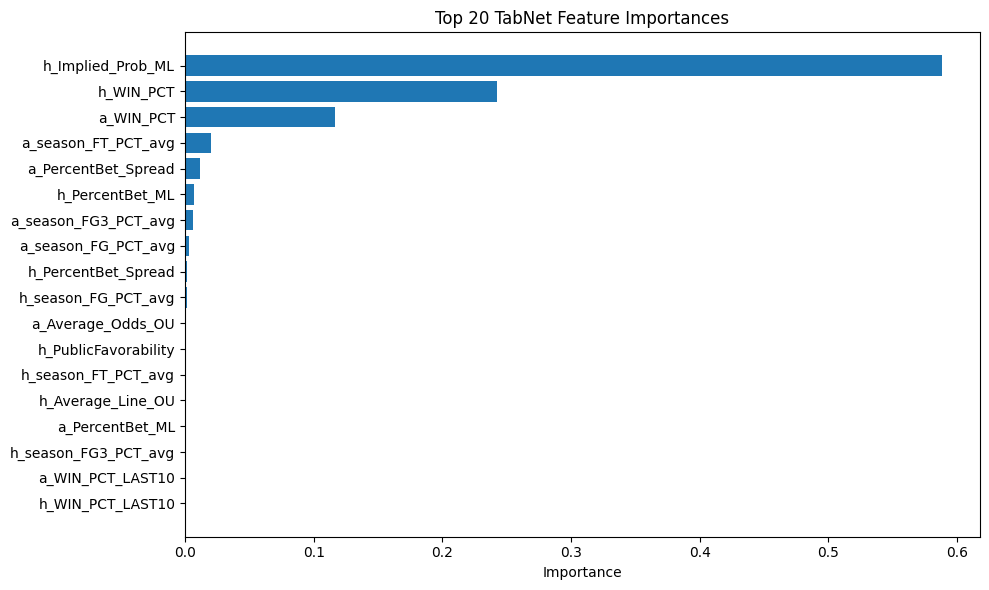

In [128]:
# Get the feature importances
importances = tabnet_model.feature_importances_

# Map to feature names
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 20
print(feature_importance_df.head(20))

# Optional: Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:20][::-1], feature_importance_df['Importance'][:20][::-1])
plt.xlabel("Importance")
plt.title("Top 20 TabNet Feature Importances")
plt.tight_layout()
plt.show()

## Simulation

### Realistic

In [164]:
import pandas as pd
import numpy as np
from datetime import timedelta

def simulate_tabnet_betting(tabnet_model, df_test_full, kelly_fraction=1/8, starting_bankroll=10):
    df = df_test_full.copy()
    
    # Ensure correct types
    df["Date"] = pd.to_datetime(df["Date"])

    # Define feature columns used in the model
    model_features = [
        'a_season_FG_PCT_avg', 'a_season_FT_PCT_avg', 'a_season_FG3_PCT_avg',
        'a_WIN_PCT', 'a_WIN_PCT_LAST10', 'h_season_FG_PCT_avg',
        'h_season_FT_PCT_avg', 'h_season_FG3_PCT_avg', 'h_WIN_PCT',
        'h_WIN_PCT_LAST10', 'h_PercentBet_ML', 'h_PercentBet_Spread',
        'h_Average_Line_OU', 'a_PercentBet_ML', 'a_PercentBet_Spread',
        'a_Average_Odds_OU', 'h_Implied_Prob_ML', 'h_PublicFavorability'
    ]
    
    # Predict probabilities using TabNet
    X = df[model_features].to_numpy(dtype=np.float32)
    probs = tabnet_model.predict_proba(X)[:, 1]
    df["predicted_prob"] = probs
    df["actual"] = df["h_cover"]

    # Convert odds to implied probabilities
    def moneyline_to_prob(odds):
        return np.where(
            odds >= 100,
            100 / (odds + 100),
            -odds / (-odds + 100)
        )

    df["odds"] = df["h_Average_Odds_Spread"]
    df["vegas_prob"] = moneyline_to_prob(df["odds"])

    # No bet if Vegas and model agree closely
    df["should_bet"] = (df["predicted_prob"] - df["vegas_prob"]).abs() > 0.25
    df["bet_on_cover"] = df["predicted_prob"] > df["vegas_prob"]

    # Sort chronologically
    df.sort_values("Date", inplace=True)

    # Initialize bankroll tracking
    bankroll = starting_bankroll
    bankroll_history = []
    daily_pending_payouts = {}
    bet_log = []

    for current_date, games_today in df.groupby("Date"):
        # Payout from yesterday's bets
        if current_date in daily_pending_payouts:
            bankroll += daily_pending_payouts.pop(current_date)

        available_bankroll = bankroll
        payout_tomorrow = 0.0

        for _, row in games_today.iterrows():
            if not row["should_bet"] or available_bankroll <= 0:
                continue

            odds = row["odds"]
            # Convert to decimal odds
            decimal_odds = (odds / 100 + 1) if odds >= 100 else (100 / abs(odds) + 1)

            # Kelly bet fraction
            p = row["predicted_prob"] if row["bet_on_cover"] else 1 - row["predicted_prob"]
            q = 1 - p
            b = decimal_odds - 1
            kelly = (b * p - q) / b
            bet_fraction = max(kelly * kelly_fraction, 0)
            bet_amount = min(available_bankroll * bet_fraction, available_bankroll)

            if bet_amount <= 0:
                continue

            won = (row["actual"] == 1) if row["bet_on_cover"] else (row["actual"] == 0)
            profit = bet_amount * (decimal_odds - 1) if won else -bet_amount

            payout_tomorrow += bet_amount + profit if won else 0
            available_bankroll -= bet_amount

            bet_log.append({
                "Date": current_date,
                "GameId": row["GameId"],
                "BetOnCover": row["bet_on_cover"],
                "Odds": odds,
                "DecimalOdds": decimal_odds,
                "BetAmount": bet_amount,
                "ModelProb": row["predicted_prob"],
                "VegasProb": row["vegas_prob"],
                "Win": won,
                "Profit": profit
            })

        bankroll = available_bankroll
        bankroll_history.append({"Date": current_date, "Bankroll": bankroll})

        tomorrow = current_date + timedelta(days=1)
        daily_pending_payouts[tomorrow] = daily_pending_payouts.get(tomorrow, 0.0) + payout_tomorrow

    # Final payout of any pending
    for payout_date in sorted(daily_pending_payouts.keys()):
        bankroll += daily_pending_payouts[payout_date]
        bankroll_history.append({"Date": payout_date, "Bankroll": bankroll})

    roi = (bankroll - starting_bankroll) / starting_bankroll * 100
    print(f"\n📊 Final Results:")
    print(f"  Final Bankroll: ${bankroll:.2f}")
    print(f"  ROI: {roi:.2f}%")
    print(f"  Total Bets Placed: {len(bet_log)}")

    return pd.DataFrame(bankroll_history), pd.DataFrame(bet_log)


In [169]:
bankroll_df, bet_log_df = simulate_tabnet_betting(tabnet_model, df_test_full)



📊 Final Results:
  Final Bankroll: $22728315.26
  ROI: 227283052.61%
  Total Bets Placed: 1248


In [ ]:
130,301,687
10,806,342
22,728,315

In [166]:
bankroll_df

,Date,Bankroll
0,2017-10-20,9.169506e+00
1,2017-10-21,7.215253e+00
2,2017-10-22,8.100640e+00
3,2017-10-23,7.073690e+00
4,2017-10-24,5.213125e+00
...,...,...
335,2018-11-22,6.041819e+06
336,2018-12-24,6.199309e+06
337,2019-02-15,6.315316e+06
338,2019-04-08,1.654398e+07


In [137]:
bet_log_df

,Date,GameId,BetOnCover,Odds,DecimalOdds,BetAmount,ModelProb,VegasProb,Win,Profit
0,2017-10-20,21700017.0,False,-105.33,1.949397,83.049447,0.163446,0.512979,False,-83.049447
1,2017-10-20,21700018.0,False,-106.67,1.937471,18.938192,0.403916,0.516137,False,-18.938192
2,2017-10-20,21700019.0,False,-108.00,1.925926,33.411157,0.337670,0.519231,True,30.936257
3,2017-10-20,21700020.0,False,-108.83,1.918864,26.746345,0.360351,0.521142,True,24.576261
4,2017-10-20,21700021.0,False,-108.00,1.925926,16.515589,0.404955,0.519231,True,15.292212
...,...,...,...,...,...,...,...,...,...,...
2419,2019-04-10,21801225.0,False,-114.17,1.875887,14631.313642,0.291292,0.533081,False,-14631.313642
2420,2019-04-10,21801226.0,False,-105.83,1.944912,15518.512647,0.282451,0.514162,False,-15518.512647
2421,2019-04-10,21801227.0,False,-105.17,1.950841,20070.204921,0.208941,0.512599,True,19083.583646
2422,2019-04-10,21801228.0,False,-107.67,1.928764,19867.493676,0.188260,0.518467,True,18452.209228


In [167]:
bet_log_df['Win'].mean()

0.65625

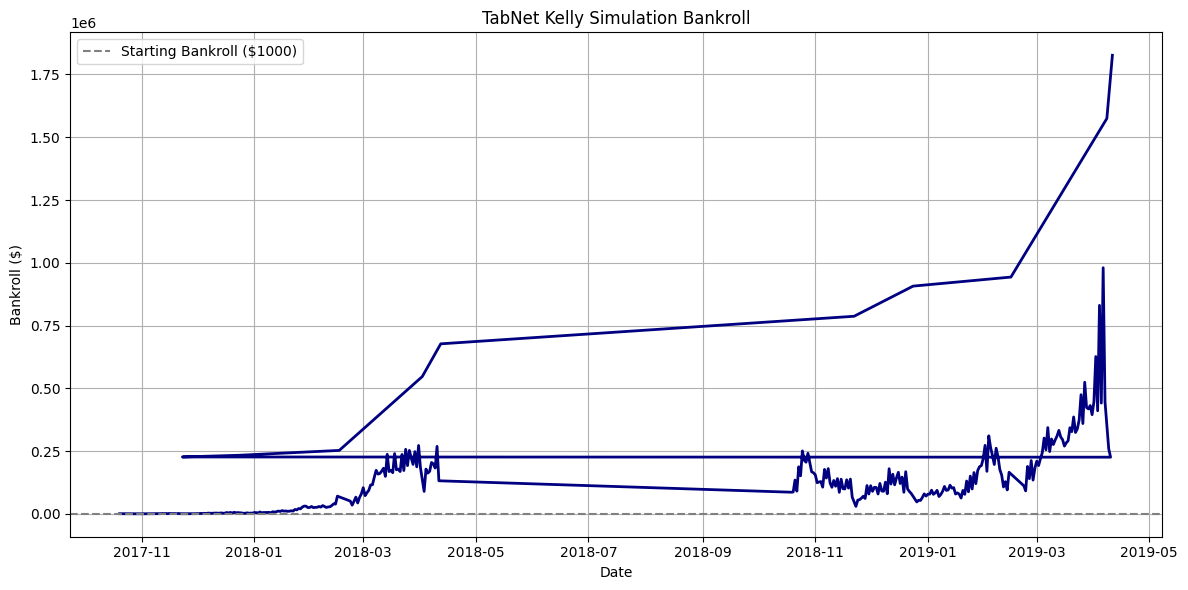

In [138]:


def plot_bankroll_over_time(bankroll_df, title="Bankroll Over Time"):
    plt.figure(figsize=(12, 6))
    plt.plot(bankroll_df["Date"], bankroll_df["Bankroll"], color='navy', linewidth=2)
    plt.axhline(1000, color='gray', linestyle='--', label='Starting Bankroll ($1000)')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Bankroll ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_bankroll_over_time(bankroll_df, title="TabNet Kelly Simulation Bankroll")


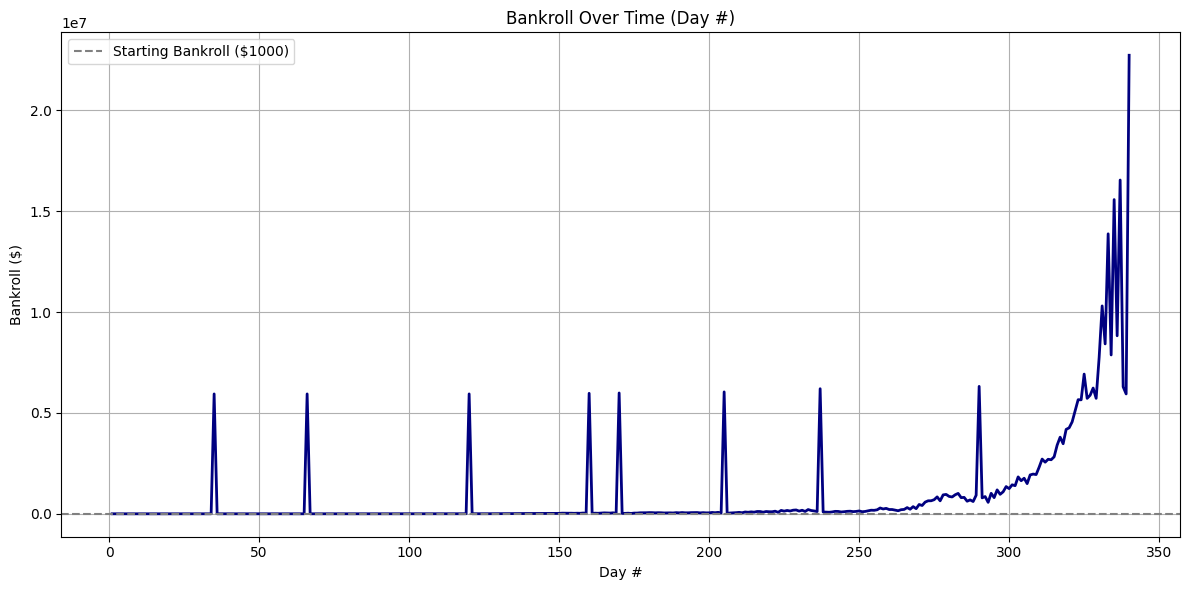

In [168]:
import matplotlib.pyplot as plt

def plot_bankroll_by_day(bankroll_df, title="Bankroll Over Time (Day #)"):
    # Drop duplicate days if necessary (keep last bankroll value per day)
    df_plot = bankroll_df.sort_values("Date").drop_duplicates("Date", keep="last").reset_index(drop=True)

    # Assign day number
    df_plot["Day"] = range(1, len(df_plot) + 1)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df_plot["Day"], df_plot["Bankroll"], color='navy', linewidth=2)
    plt.axhline(1000, color='gray', linestyle='--', label='Starting Bankroll ($1000)')
    plt.title(title)
    plt.xlabel("Day #")
    plt.ylabel("Bankroll ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
plot_bankroll_by_day(bankroll_df)


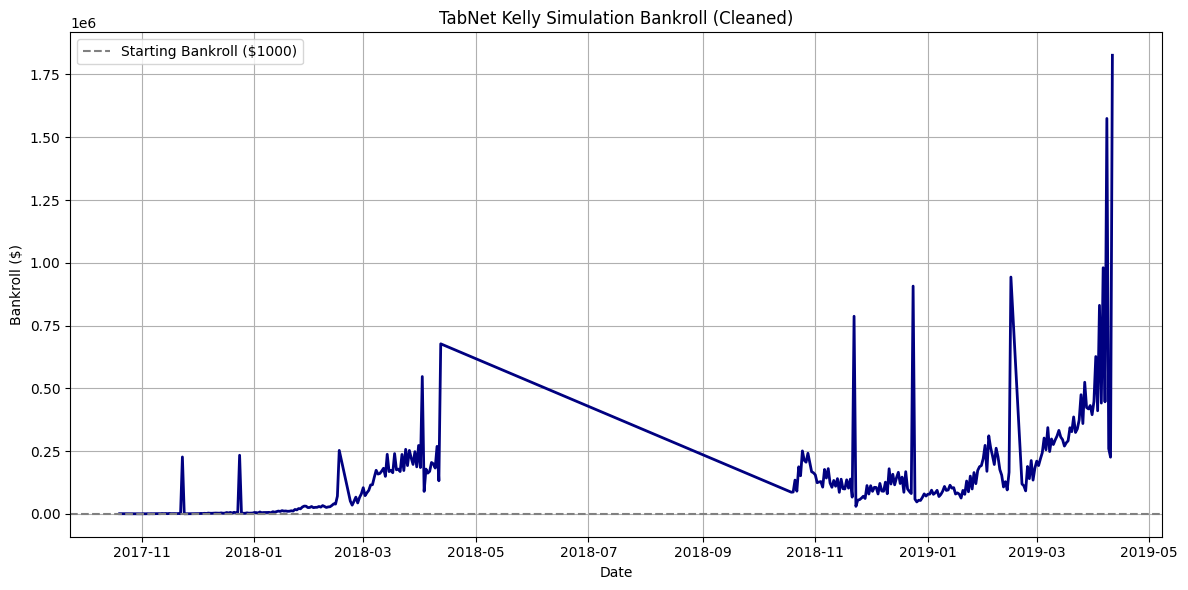

In [139]:
# Drop duplicate Date entries by keeping the last value (i.e., after all payouts processed)
bankroll_df_unique = bankroll_df.sort_values("Date").drop_duplicates("Date", keep="last")

plot_bankroll_over_time(bankroll_df_unique, title="TabNet Kelly Simulation Bankroll (Cleaned)")


### Fixed Betting Strategy

TabNet

In [153]:
# Step 1: Predict class labels (0 or 1)
preds = tabnet_model.predict(X_test_np)

# Step 2: Set up simulation parameters
initial_bankroll = 1000.0
bankroll = initial_bankroll
bankroll_history = [bankroll]

fixed_bet = 20.0
decimal_odds = 1.91  # typical spread odds
b = decimal_odds - 1

# Step 3: Simulate each bet
for pred, actual in zip(preds, y_test):
    if pred == 1:  # model says "bet on home team to cover"
        if actual == 1:
            # Win
            bankroll += fixed_bet * (decimal_odds - 1)
        else:
            # Lose
            bankroll -= fixed_bet
        bankroll_history.append(bankroll)

# Step 4: Calculate ROI
roi = (bankroll - initial_bankroll) / initial_bankroll
print(f"Final Bankroll: ${bankroll:.2f}")
print(f"ROI: {roi * 100:.2f}%")
print(f"Number of bets placed: {len(bankroll_history) - 1}")

Final Bankroll: $4554.40
ROI: 355.44%
Number of bets placed: 571


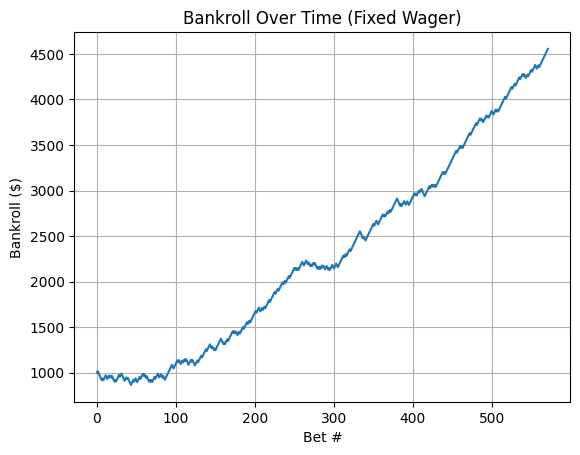

In [154]:
plt.plot(bankroll_history)
plt.title("Bankroll Over Time (Fixed Wager)")
plt.xlabel("Bet #")
plt.ylabel("Bankroll ($)")
plt.grid(True)
plt.show()


In [151]:

# Step 1: Get predicted probabilities for class 1 (home team covers)
probs = tabnet_model.predict_proba(X_test_np)[:, 1]

# Step 2: Setup simulation params
initial_bankroll = 1000.0
max_bet_size = 10000
bankroll = initial_bankroll
bankroll_history = [bankroll]
wager_fraction = 1 / 8
decimal_odds = 1.91  # assume standard -110 payout for spread bets
b = decimal_odds - 1

# Step 3: Loop through each game
for p, actual in zip(probs, y_test):
    q = 1 - p
    kelly_fraction = (b * p - q) / b
    bet_fraction = max(kelly_fraction * wager_fraction, 0)  # no negative bets

    bet_amount = min(bankroll * bet_fraction, max_bet_size)
    if actual == 1:  # home team covered
        bankroll += bet_amount * (decimal_odds - 1)
    else:
        bankroll -= bet_amount

    bankroll_history.append(bankroll)

# Step 4: Calculate ROI
roi = (bankroll - initial_bankroll) / initial_bankroll
print(f"Final Bankroll: ${bankroll:.2f}")
print(f"ROI: {roi * 100:.2f}%")


Final Bankroll: $791546.98
ROI: 79054.70%


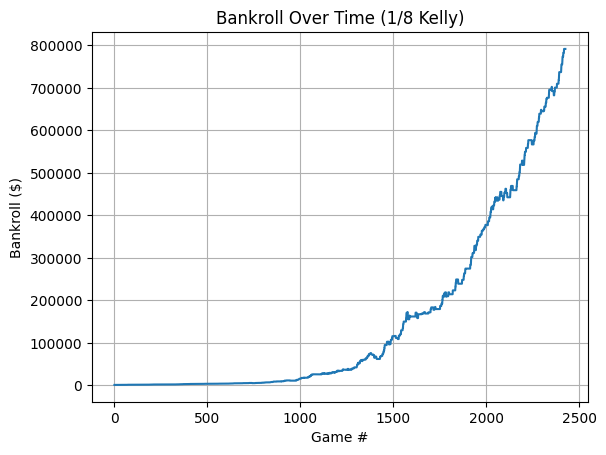

In [152]:
plt.plot(bankroll_history)
plt.title("Bankroll Over Time (1/8 Kelly)")
plt.xlabel("Game #")
plt.ylabel("Bankroll ($)")
plt.grid(True)
plt.show()


SVM

In [ ]:
def simulate_fixed_wager(model, model_name):
    preds = model.predict(X_test_np)

    bankroll = initial_bankroll
    bankroll_history = [bankroll]

    for pred, actual in zip(preds, y_test):
        if pred == 1:
            if actual == 1:
                bankroll += fixed_bet * (decimal_odds - 1)
            else:
                bankroll -= fixed_bet
            bankroll_history.append(bankroll)

    roi = (bankroll - initial_bankroll) / initial_bankroll
    print(f"{model_name} — Fixed Wager:")
    print(f"  Final Bankroll: ${bankroll:.2f}")
    print(f"  ROI: {roi * 100:.2f}%")
    return bankroll_history


In [ ]:
def simulate_kelly(model, model_name):
    probs = model.predict_proba(X_test_np)[:, 1]

    bankroll = initial_bankroll
    bankroll_history = [bankroll]
    wager_fraction = 1 / 8

    for p, actual in zip(probs, y_test):
        q = 1 - p
        kelly_fraction = (b * p - q) / b
        bet_fraction = max(kelly_fraction * wager_fraction, 0)

        bet_amount = bankroll * bet_fraction
        if actual == 1:
            bankroll += bet_amount * b
        else:
            bankroll -= bet_amount
        bankroll_history.append(bankroll)

    roi = (bankroll - initial_bankroll) / initial_bankroll
    print(f"{model_name} — 1/8 Kelly:")
    print(f"  Final Bankroll: ${bankroll:.2f}")
    print(f"  ROI: {roi * 100:.2f}%")
    return bankroll_history


In [119]:
# Random Forest
rf_fixed = simulate_fixed_wager(rf_model, "Random Forest")
rf_kelly = simulate_kelly(rf_model, "Random Forest")

# SVM
svm_fixed = simulate_fixed_wager(svm_model, "SVM")
svm_kelly = simulate_kelly(svm_model, "SVM")


📊 Random Forest — Fixed Wager:
  Final Bankroll: $3011.80
  ROI: 201.18%
📊 Random Forest — 1/8 Kelly:
  Final Bankroll: $7183023.38
  ROI: 718202.34%
📊 SVM — Fixed Wager:
  Final Bankroll: $3786.20
  ROI: 278.62%
📊 SVM — 1/8 Kelly:
  Final Bankroll: $563174.05
  ROI: 56217.41%


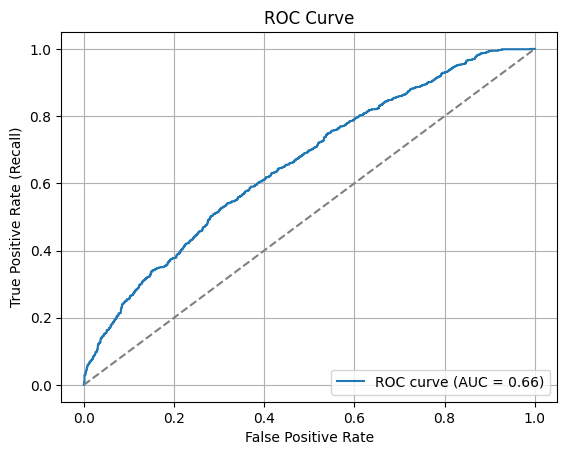

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


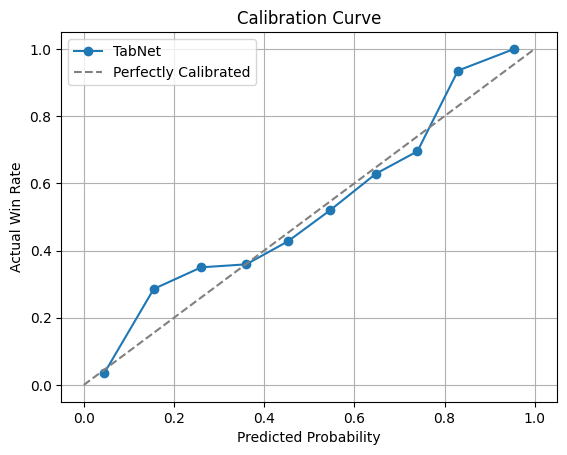

In [48]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get calibration data (e.g., 10 bins)
prob_true, prob_pred = calibration_curve(y_test, y_proba,n_bins = 10, strategy='uniform')

# Plot
plt.plot(prob_pred, prob_true, marker='o', label='TabNet')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')

plt.xlabel('Predicted Probability')
plt.ylabel('Actual Win Rate')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()


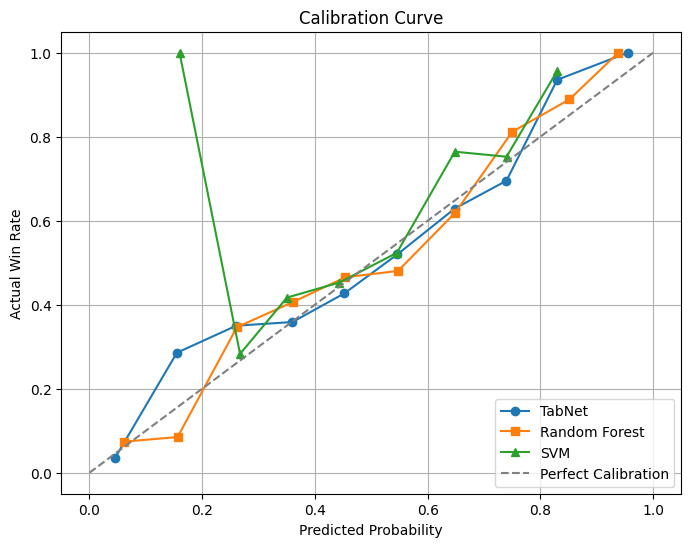

In [125]:
# combined calibration

tabnet_probs = tabnet_model.predict_proba(X_test_np)[:, 1]
rf_probs = rf_model.predict_proba(X_test_np)[:, 1]
svm_probs = svm_model.predict_proba(X_test_np)[:, 1]

# Compute calibration curves
tabnet_true, tabnet_pred = calibration_curve(y_test, tabnet_probs, n_bins=10, strategy='uniform')
rf_true, rf_pred = calibration_curve(y_test, rf_probs, n_bins=10, strategy='uniform')
svm_true, svm_pred = calibration_curve(y_test, svm_probs, n_bins=10, strategy='uniform')

# Plot
plt.figure(figsize=(8, 6))
plt.plot(tabnet_pred, tabnet_true, marker='o', label='TabNet')
plt.plot(rf_pred, rf_true, marker='s', label='Random Forest')
plt.plot(svm_pred, svm_true, marker='^', label='SVM')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')

plt.xlabel('Predicted Probability')
plt.ylabel('Actual Win Rate')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score
import torch

# STEP 5: Fit TabNet
tabnet_model = TabNetClassifier(
    device_name='cuda' if torch.cuda.is_available() else 'cpu',
    verbose=1,
    seed=42
)

tabnet_model.fit(
    X_train=X_train_np, y_train=y_train,
    eval_set=[(X_val_np, y_val)],
    eval_name=['val'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
)

# CHECK: Should see training logs, no dtype errors


/home/ehe5bn/.local/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.73956 | val_accuracy: 0.42339 |  0:00:00s
epoch 1  | loss: 0.69382 | val_accuracy: 0.49341 |  0:00:00s
epoch 2  | loss: 0.65647 | val_accuracy: 0.47117 |  0:00:00s
epoch 3  | loss: 0.6532  | val_accuracy: 0.4687  |  0:00:00s
epoch 4  | loss: 0.64647 | val_accuracy: 0.42257 |  0:00:00s
epoch 5  | loss: 0.6432  | val_accuracy: 0.40527 |  0:00:00s
epoch 6  | loss: 0.63804 | val_accuracy: 0.58731 |  0:00:01s
epoch 7  | loss: 0.6383  | val_accuracy: 0.60544 |  0:00:01s
epoch 8  | loss: 0.63348 | val_accuracy: 0.60873 |  0:00:01s
epoch 9  | loss: 0.63663 | val_accuracy: 0.61203 |  0:00:01s
epoch 10 | loss: 0.62982 | val_accuracy: 0.59802 |  0:00:01s
epoch 11 | loss: 0.62478 | val_accuracy: 0.59308 |  0:00:01s
epoch 12 | loss: 0.62371 | val_accuracy: 0.60297 |  0:00:02s
epoch 13 | loss: 0.62136 | val_accuracy: 0.60461 |  0:00:02s
epoch 14 | loss: 0.61365 | val_accuracy: 0.61038 |  0:00:02s
epoch 15 | loss: 0.61372 | val_accuracy: 0.60379 |  0:00:02s
epoch 16 | loss: 0.61072

/home/ehe5bn/.local/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# get rid of inverse columns 

### Setting up Data for the Model

In [ ]:
# Adding season columns (ex: Season 2012-2013 is season 1)
season_order = sorted(combined_df['YEAR_x'].unique())
season_to_index = {season: i+1 for i, season in enumerate(season_order)}
combined_df['SEASON_NUM'] = combined_df['YEAR_x'].map(season_to_index)

# Dropping rows with Missing values for now
combined_df = combined_df.dropna()

In [ ]:
# Filtering data into train (2012 - 2016), validation (2017), test seasons (2018-2019)
train_df = combined_df[combined_df['SEASON_NUM'] <= 3]    # Seasons 1-3
val_df = combined_df[combined_df['SEASON_NUM'] == 4]      # Season 4
test_df = combined_df[combined_df['SEASON_NUM'] >= 5]     # Seasons 5-6

In [66]:
combined_df.columns

Index(['GAME_ID', 'GAME_SEQUENCE', 'Date_x', 'YEAR_x', 'GAME_DATE_EST',
       'a_index_x', 'a_TEAM_ID', 'a_TEAM_WINS_LOSSES', 'a_PTS', 'a_FG_PCT',
       ...
       'h_Average_Line_OU', 'h_Average_Odds_OU', 'h_Best_Line_OU',
       'h_Worst_Line_OU', 'h_Best_Odds_OU', 'h_Worst_Odds_OU', 'h_Pts',
       'h_Spread', 'h_Result', 'h_Total'],
      dtype='object', length=166)

In [67]:
# Dropping columns that we don't need?
columns_to_drop = ['a_PTS', 'a_FG_PCT', 'a_FT_PCT','a_FG3_PCT', 'a_AST', 'a_REB', 'a_TOV','GAME_ID',
                   'h_PTS', 'h_FG_PCT', 'h_FT_PCT', 'h_FG3_PCT','h_AST', 'h_REB', 'h_TOV',
                   'GAME_SEQUENCE', 'Date_x', 'YEAR_x', 'a_index_x', 'a_index_y', 'a_TEAM_ID','h_TEAM_ID', 'a_TEAM_WINS_LOSSES',
                  'h_TEAM_WINS_LOSSES', 'IS_PLAYOFF_GAME', 'GAME_DATE_EST', 'h_index_x', 'h_index_y','SEASON_NUM', 'HOME_WIN']


# Creating train, validation, and test sets
X_train = train_df.drop(columns_to_drop, axis = 1)
y_train = train_df['HOME_WIN']

X_val = val_df.drop(columns_to_drop, axis = 1)
y_val = val_df['HOME_WIN']

X_test = test_df.drop(columns_to_drop, axis = 1)
y_test = test_df['HOME_WIN']

In [ ]:
X_train.drop(columns=['a_WINS', 'a_LOSSES', 'h_WINS', 'a_SEASON_GAMES_PLAYED', 'h_SEASON_GAMES_PLAYED', 'a_season_PTS_lag', 'a_season_AST_lag', 'a_season_REB_lag', 'a_season_TOV_lag', 'h_season_PTS_lag', 'h_season_AST_lag', 'h_season_REB_lag', 'h_season_TOV_lag'], inplace=True)

,a_WINS,a_LOSSES,h_WINS,h_LOSSES,a_SEASON_GAMES_PLAYED,h_SEASON_GAMES_PLAYED,a_season_PTS_lag,a_season_AST_lag,a_season_REB_lag,a_season_TOV_lag,a_season_FG_PCT_avg,a_season_FT_PCT_avg,a_season_FG3_PCT_avg,a_WIN_PCT,a_WIN_PCT_LAST10,h_season_PTS_lag,h_season_AST_lag,h_season_REB_lag,h_season_TOV_lag,h_season_FG_PCT_avg,h_season_FT_PCT_avg,h_season_FG3_PCT_avg,h_WIN_PCT,h_WIN_PCT_LAST10,a_Location,a_Team,a_OppTeam,a_TeamId,a_PercentBet_ML,a_Open_Line_ML,a_Pinnacle_ML,a_5dimes_ML,a_Heritage_ML,a_Bovada_ML,a_Betonline_ML,a_Average_Line_ML,a_Best_Line_ML,a_Worst_Line_ML,a_PercentBet_Spread,a_Open_Line_Spread,a_Open_Odds_Spread,a_Pinnacle_Line_Spread,a_Pinnacle_Odds_Spread,a_5dimes_Line_Spread,a_5dimes_Odds_Spread,a_Heritage_Line_Spread,a_Heritage_Odds_Spread,a_Bovada_Line_Spread,a_Bovada_Odds_Spread,a_Betonline_Line_Spread,a_Betonline_Odds_Spread,a_Average_Line_Spread,a_Average_Odds_Spread,a_Best_Line_Spread,a_Worst_Line_Spread,a_Best_Odds_Spread,a_Worst_Odds_Spread,a_PercentBet_OU,a_Open_Line_OU,a_Open_Odds_OU,a_Pinnacle_Line_OU,a_Pinnacle_Odds_OU,a_5dimes_Line_OU,a_5dimes_Odds_OU,a_Heritage_Line_OU,a_Heritage_Odds_OU,a_Bovada_Line_OU,a_Bovada_Odds_OU,a_Betonline_Line_OU,a_Betonline_Odds_OU,a_Average_Line_OU,a_Average_Odds_OU,a_Best_Line_OU,a_Worst_Line_OU,a_Best_Odds_OU,a_Worst_Odds_OU,a_Pts,a_Spread,a_Result,a_Total,h_Location,h_Team,h_OppTeam,h_TeamId,h_PercentBet_ML,h_Open_Line_ML,h_Pinnacle_ML,h_5dimes_ML,h_Heritage_ML,h_Bovada_ML,h_Betonline_ML,h_Average_Line_ML,h_Best_Line_ML,h_Worst_Line_ML,h_PercentBet_Spread,h_Open_Line_Spread,h_Open_Odds_Spread,h_Pinnacle_Line_Spread,h_Pinnacle_Odds_Spread,h_5dimes_Line_Spread,h_5dimes_Odds_Spread,h_Heritage_Line_Spread,h_Heritage_Odds_Spread,h_Bovada_Line_Spread,h_Bovada_Odds_Spread,h_Betonline_Line_Spread,h_Betonline_Odds_Spread,h_Average_Line_Spread,h_Average_Odds_Spread,h_Best_Line_Spread,h_Worst_Line_Spread,h_Best_Odds_Spread,h_Worst_Odds_Spread,h_PercentBet_OU,h_Open_Line_OU,h_Open_Odds_OU,h_Pinnacle_Line_OU,h_Pinnacle_Odds_OU,h_5dimes_Line_OU,h_5dimes_Odds_OU,h_Heritage_Line_OU,h_Heritage_Odds_OU,h_Bovada_Line_OU,h_Bovada_Odds_OU,h_Betonline_Line_OU,h_Betonline_Odds_OU,h_Average_Line_OU,h_Average_Odds_OU,h_Best_Line_OU,h_Worst_Line_OU,h_Best_Odds_OU,h_Worst_Odds_OU,h_Pts,h_Spread,h_Result,h_Total
0,1,0,1,0,1,1,94,22,54,20,0.456000,0.682000,0.350000,1.000000,1.0,0,0,0,0,0.489000,0.867167,0.401333,1.000000,1.0,home,Cleveland,Chicago,1.610613e+09,34.7,125.0,120.0,130.0,125.0,130.0,125.0,126.0,130.0,120.0,39.0,2.0,-110.0,2.5,-107.0,3.0,-105.0,2.5,-105.0,3.0,-105.0,3.0,-115.0,2.67,-107.83,3.0,2.0,-105.0,-115.0,63.2,186.0,-110.0,183.5,-105.0,183.5,-105.0,183.5,-110.0,184.0,-110.0,183.5,-110.0,184.00,-108.33,186.0,183.5,-105.0,-110.0,86.0,-29.0,L,201.0,away,Chicago,Cleveland,1.610613e+09,65.3,-145.0,-133.0,-140.0,-145.0,-150.0,-145.0,-142.6,-133.0,-150.0,61.0,-2.0,-110.0,-2.5,-103.0,-3.0,-105.0,-2.5,-115.0,-3.0,-115.0,-3.0,-105.0,-2.67,-108.83,-2.0,-3.0,-103.0,-115.0,36.8,186.0,-110.0,183.5,-105.0,183.5,-105.0,183.5,-110.0,184.0,-110.0,183.5,-110.0,184.00,-108.33,186.0,183.5,-105.0,-110.0,115.0,29.0,W,201.0
1,0,1,1,0,1,1,95,26,43,13,0.438000,0.913000,0.235000,0.000000,0.0,113,24,61,14,0.427000,0.738000,0.429000,1.000000,1.0,home,New Orleans,Utah,1.610613e+09,49.4,145.0,137.0,143.0,140.0,140.0,140.0,140.0,143.0,137.0,60.0,3.5,-110.0,3.5,-110.0,3.5,-105.0,3.5,-110.0,3.5,-110.0,3.5,-110.0,3.50,-109.17,3.5,3.5,-105.0,-110.0,50.0,189.5,-110.0,191.0,-102.0,191.0,-102.0,191.0,-110.0,191.0,-110.0,191.0,-110.0,190.75,-107.33,191.0,189.5,-102.0,-110.0,88.0,2.0,W,174.0,away,Utah,New Orleans,1.610613e+09,50.6,-165.0,-152.0,-153.0,-160.0,-160.0,-160.0,-157.0,-152.0,-160.0,40.0,-3.5,-110.0,-3.5,-100.0,-3.5,-105.0,-3.5,-110.0,-3.5,-110.0,-3.5,-110.0,-3.50,-107.50,-3.5,-3.5,-100.0,-110.0,50.0,189.5,-110.0,191.0,-108.0,191.0,-108.0,191.0,-110.0,191.0,-110.0,191.0,-110.0,190.75,-109.33,191.0,189.5,-108.0,-110.0,86.0,-2.0,L,174.0
2,1,0,0,1,1,1,0,0,0,0,0.460900,0.793333,0.321033,1.000000,1.0,84,18,48,18,0

In [39]:
# Checking Nans totals for differnet columns
vegas.isna().sum().sort_values(ascending=False)

a_Bovada_ML        1685
h_Bovada_ML        1685
a_Open_Line_ML      168
h_Open_Line_ML      168
a_Betonline_ML      144
                   ... 
h_PercentBet_OU       0
h_Pts                 0
h_Spread              0
h_Result              0
h_Total               0
Length: 117, dtype: int64

### Feature Engineering:

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
# Scaling the data with mean 0 and standard deviation 1

# Fit scaler on training features only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply same scaler to val/test
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [47]:
X_test_scaled.dtype

dtype('float64')

In [44]:
# Testing TabNet Model
clf = TabNetClassifier(
    n_d=16,               # Number of decision prediction steps
    n_a=16,               # Number of attention steps (usually equal to n_d)
    n_steps=5,            # Number of steps in TabNet
    gamma=1.5,            # Relaxation factor
    lambda_sparse=1e-4,   # Sparse regularization
    optimizer_fn=torch.optim.Adam,  
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},  
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

clf.fit(
    X_train=X_train_scaled, y_train=y_train,
    eval_set=[(X_val_scaled, y_val)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=10,         # Early stopping
    batch_size=1024, 
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/Users/lathangregg/Documents/MSDS/Spring25/DS6050_DL/Project/DL_project/.venv/lib/python3.12/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


RuntimeError: Could not infer dtype of numpy.float32

In [39]:
# Predicting on test data
y_pred = clf.predict(X_test_scaled)
y_proba = clf.predict_proba(X_test_scaled)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

NameError: name 'clf' is not defined